### 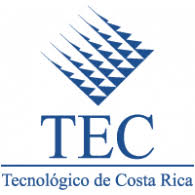



## **Maestría en Electrónica - Procesamiento Digital de Señales.**
### **Curso:** Reconocimiento de Patrones 
### **Investigación Corta #1**: *Pre-Procesamiento.*    
### Carlos Brenes Jimenez. **Id:** 9002170

## **1. Se deben importar las librerías necesarias de Python  para Pre-Procesamiento.**

In [167]:
import numpy as np
import pandas as pd
import seaborn as sbs
from matplotlib import pyplot as plt
%matplotlib inline

## **2. Se verifica la revisión de las librerías (por ejemplo: pandas).**

In [168]:
pd.__version__ # Revisión de Pandas cargada

'1.0.3'

## **3. Se selecciona el Conjunto de datos para pre-procesamiento:**

### **Airplane Crash Data Since 1908:** https://www.kaggle.com/cgurkan/airplane-crash-data-since-1908?select=Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv

## **4. Se carga el conjunto de datos por medio de la librería Pandas a la variable "df"**

In [169]:
df = pd.read_csv('/home/carlos/Documents/2020/TEC/Q2/RdP/DataSet/Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv')

## **5. Se realiza Análisis Exploratorio de Datos (EDA)** 

### **5.1 Se determina el tamaño del dataframe (Filas,Columnas)**

In [170]:
df_size = df.shape
df_size # tipo tupla

(4967, 17)

## **5.2 Se Muestran los datos iniciales y finales del "Dataframe"**

### **Se extraen las cinco primeras y últimas filas de la matriz de datos.**
#### **Sintaxis:** ```dataframe.head(número de filas)```, ```dataframe.tail(número de filas)```
## **Observaciones:**
### + Se observan datos tipo NaN ("Not a Number") en varias columnas del conjunto de datos. 
### + Los datos "NaN" son un problema para los algoritmos de regresión o clasificación en las etapas siguientes al pre-procesado. Los algoritmos requieren datos númericos y los "NaN" son tipo "strings"
### + Opciones en este punto son:
        1. Eliminación de los datos "NaN".
        2. Sustitución de los datos "NaN" por los valores de la media o la mediana segun el caso.

In [171]:
df_inicio = df.head(5)
df_inicio

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [172]:
df_cola = df.tail(5)
df_cola

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
4962,04/16/2019,11:00,"Puerto Montt, Chile",Archipelagos Service Aereos,NaN,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,5.0,1.0,6.0,5.0,1.0,0.0,"While the aircraft was in the initial climb, p..."
4963,05/05/2019,18:30,"Near Monclava, Mexico",TVPX Aircraft Solutions,NaN,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,11.0,2.0,13.0,11.0,2.0,0.0,The aircraft crashed while en route on a retur...
4964,05/05/2019,18:30,"Moscow, Russia",Aeroflot Russian International Airlines,NaN,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78.0,73.0,5.0,41.0,40.0,1.0,0.0,Forty-five minutes after taking off from Mosco...
4965,06/03/2019,13:00,"Near Lipo, India",Military - Indian Air Force,NaN,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,13.0,5.0,8.0,13.0,5.0,8.0,0.0,Crashed about 34km WNW of Mechuka.
4966,07/30/2019,02:00,"Rawalpindi, India",Military - Pakistan Army,NaN,Training,Beechcraft B300 King Air,766,B766,5.0,0.0,5.0,5.0,0.0,5.0,14.0,"The Pakistani military plane, on a training fl..."


## **5.3 Extraer información de las columnas (Etiquetas, índices y tipo de datos) presentes en el conjunto de datos**
``` df_columnas = df.columns ``` , ```df_index = df.index``` y ```df.dtypes```

In [173]:
df_columnas = df.columns
df_columnas

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'AC Type',
       'Registration', 'cn/ln', 'Aboard', 'Aboard Passangers', 'Aboard Crew',
       'Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground',
       'Summary'],
      dtype='object')

In [174]:
df_index = df.index 
df_index

RangeIndex(start=0, stop=4967, step=1)

In [175]:
df_index
df.dtypes

Date                      object
Time                      object
Location                  object
Operator                  object
Flight #                  object
Route                     object
AC Type                   object
Registration              object
cn/ln                     object
Aboard                   float64
Aboard Passangers        float64
Aboard Crew              float64
Fatalities               float64
Fatalities Passangers    float64
Fatalities Crew          float64
Ground                   float64
Summary                   object
dtype: object

## **5.4 Se cambian algunas etiquetas de las columnas del set de datos para una mejor manipulación posterior**
``` df_rename(columns={ 'Old Name1': 'New Name1', 'Old Name2': 'New Name2' }, inplace=True)```

In [176]:
df.rename(columns={'Aboard Passangers': 'AboardPassangers', 'Aboard Crew': 'AboardCrew'}, inplace=True)
df.rename(columns={'Fatalities Passangers': 'FatalitiesPassangers', 'Fatalities Crew': 'FatalitiesCrew'}, inplace=True)

In [177]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'AC Type',
       'Registration', 'cn/ln', 'Aboard', 'AboardPassangers', 'AboardCrew',
       'Fatalities', 'FatalitiesPassangers', 'FatalitiesCrew', 'Ground',
       'Summary'],
      dtype='object')

## **5.5 Se Eliminan filas con datos "NaN" del conjunto de datos** 

In [222]:
print('Tamaño Original del conjunto de datos: ', df.shape)

Tamaño Original del conjunto de datos:  (4967, 17)


In [223]:
df_drop_na = df.dropna()
print('Tamaño del conjunto de datos al eliminar filas con datos "NaN: ', df_drop_na.shape)

Tamaño del conjunto de datos al eliminar filas con datos "NaN:  (1231, 17)


## **Nota:** Se pueden re-inicializar los índices del nuevo conjunto de datos por medio de:
```dataframe.reset_index()```

In [224]:
df_drop_na.reset_index()

,index,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,AboardPassangers,AboardCrew,Fatalities,FatalitiesPassangers,FatalitiesCrew,Ground,Summary
0,217,01/19/1930,18:23,"Oceanside, California",Maddux Airlines,7,"Aqua Caliente, Mexico - Los Angeles",Ford 5-AT-C Tri Motor,NC9689,5-AT-046,16.0,14.0,2.0,16.0,14.0,2.0,0.0,"While en route to Los Angeles, the pilot, flyi..."
1,247,03/31/1931,10:45,"Bazaar, Kansas",Trans Continental and Western Air,599,Kansas City - Wichita - Los Angeles,Fokker F10A Trimotor,NC-999,1063,8.0,6.0,2.0,8.0,6.0,2.0,0.0,"Shortly after taking off from Kansas City, one..."
2,348,08/31/1934,22:45,"Amazonia, Missouri",Rapid Air Transport,6,Kansas City - Saint Joseph - Omaha,Stinson SM-6000B,NC11118,5004,5.0,4.0,1.0,5.0,4.0,1.0,0.0,The plane crashed about 11 miles from St. Jose...
3,370,05/06/1935,03:30,"Atlanta, Missouri",Trans Continental and Western Air,6,Los Angeles - Albuquerque - Kanasas City - Wa...,Douglas DC-2-112,NC13785,1295,14.0,12.0,2.0,5.0,3.0,2.0,0.0,The plane crashed while en route from Albuquer...
4,384,08/14/1935,23:45,"Near Gilmer, Texas",Delta Air Lines,4,Dallas - Atlanta,Stinson Model A,NC14599,9103,4.0,3.0,1.0,4.0,3.0,1.0,0.0,Crashed 3 miles south of Gilmer. The outboard ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,4950,04/17/2018,10:04,"NW of Philadelphia, Pennsylvania",Southwest Airlines,1380,New York - Dallas,Boeing 737-7H4,N722SW,27880/601,149.0,144.0,5.0,1.0,1.0,0.0,0.0,"While climbing to FL320, the No. 1 engine suff..."
1227,4952,05/18/2018,12:08,"Havana, Cuba",Cubana (leased from Global Air),972,Havana- Holguin,Boeing 737-201,XA-UHZ,21816/592,113.0,107.0,6.0,112.0,106.0,6.0,0.0,After taking off from runway 06 at Havana-José...
1228,4956,10/29/2018,06:31,"Off Jakarta, Indonesia",Lion Air,610,Jakarta - Pangkal Pinang,Boeing 737-MAX 8,PK-LQP,43000/7058,189.0,181.0,8.0,189.0,181.0,8.0,0.0,"The airliner crashed into the Jakarta Sea, 13 ..."
1229,4959,02/23/2019,12:45,"Houston, Texas",Atlas Air serving Amazon,3591,Miami - Houston,Boeing 767-375ER,N1217A,25865,3.0,0.0,3.0,3.0,0.0,3.0,0.0,ATC lost radar contact with the cargo jet when...


## **5.6 Se puede crear un sub-conjunto de datos y se calcula la media y la mediana en las columnas de punto flotante del set de datos**

In [225]:
import numpy as np 

In [226]:
fatalities_mean = df_drop_na.groupby(['Location','Operator'])['Aboard', 'AboardPassangers','AboardCrew',
                                                              'Fatalities', 'FatalitiesPassangers',
                                                              'FatalitiesCrew'].mean()

round(fatalities_mean) # Se redondea los promedios a enteros

<ipython-input-226-063ed0d59623>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fatalities_mean = df_drop_na.groupby(['Location','Operator'])['Aboard', 'AboardPassangers','AboardCrew',


,,Aboard,AboardPassangers,AboardCrew,Fatalities,FatalitiesPassangers,FatalitiesCrew
Location,Operator,,,,,,
"\tKrasnoyarsk, Russia",Aeroflot,53.0,49.0,4.0,2.0,2.0,0.0
"\tPreobrazhenka, Ukraine",Aeroflot,55.0,51.0,4.0,55.0,51.0,4.0
"\tRostov-on-Don, Russia",Flydubai,62.0,55.0,7.0,62.0,55.0,7.0
"\tSverdlovsk, Russia",Aeroflot,26.0,21.0,5.0,9.0,4.0,5.0
"Kazakh, Russia",Aeroflot,27.0,22.0,5.0,27.0,22.0,5.0
...,...,...,...,...,...,...,...
"Zeleznogorsk, Russian",Aeroflot /Military - Russian,40.0,29.0,11.0,40.0,29.0,11.0
"Zeya, Russia",Aeroflot,34.0,29.0,5.0,3.0,1.0,2.0
"Zurich, Switzerland",Balkan Bulgarian Airlines,47.0,39.0,8.0,45.0,38.0,7.0


In [227]:
fatalities_median = df_drop_na.groupby(['Location','Operator'])['Aboard', 'AboardPassangers',
                                                                'AboardCrew', 'Fatalities', 'FatalitiesPassangers',
                                                                'FatalitiesCrew'].median()
round(fatalities_median)

<ipython-input-227-fd68c444f748>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fatalities_median = df_drop_na.groupby(['Location','Operator'])['Aboard', 'AboardPassangers',


,,Aboard,AboardPassangers,AboardCrew,Fatalities,FatalitiesPassangers,FatalitiesCrew
Location,Operator,,,,,,
"\tKrasnoyarsk, Russia",Aeroflot,53.0,49.0,4.0,2.0,2.0,0.0
"\tPreobrazhenka, Ukraine",Aeroflot,55.0,51.0,4.0,55.0,51.0,4.0
"\tRostov-on-Don, Russia",Flydubai,62.0,55.0,7.0,62.0,55.0,7.0
"\tSverdlovsk, Russia",Aeroflot,26.0,21.0,5.0,9.0,4.0,5.0
"Kazakh, Russia",Aeroflot,27.0,22.0,5.0,27.0,22.0,5.0
...,...,...,...,...,...,...,...
"Zeleznogorsk, Russian",Aeroflot /Military - Russian,40.0,29.0,11.0,40.0,29.0,11.0
"Zeya, Russia",Aeroflot,34.0,29.0,5.0,3.0,1.0,2.0
"Zurich, Switzerland",Balkan Bulgarian Airlines,47.0,39.0,8.0,45.0,38.0,7.0


## **5.7 Se puede crear un subconjunto de datos de interés**

In [239]:
subconjunto = df_drop_na.loc[:, ['Date','Location', 'Operator', 'Aboard','Fatalities','FatalitiesPassangers', 
                                 'FatalitiesCrew']].reset_index()
subconjunto

,index,Date,Location,Operator,Aboard,Fatalities,FatalitiesPassangers,FatalitiesCrew
0,217,01/19/1930,"Oceanside, California",Maddux Airlines,16.0,16.0,14.0,2.0
1,247,03/31/1931,"Bazaar, Kansas",Trans Continental and Western Air,8.0,8.0,6.0,2.0
2,348,08/31/1934,"Amazonia, Missouri",Rapid Air Transport,5.0,5.0,4.0,1.0
3,370,05/06/1935,"Atlanta, Missouri",Trans Continental and Western Air,14.0,5.0,3.0,2.0
4,384,08/14/1935,"Near Gilmer, Texas",Delta Air Lines,4.0,4.0,3.0,1.0
...,...,...,...,...,...,...,...,...
1226,4950,04/17/2018,"NW of Philadelphia, Pennsylvania",Southwest Airlines,149.0,1.0,1.0,0.0
1227,4952,05/18/2018,"Havana, Cuba",Cubana (leased from Global Air),113.0,112.0,106.0,6.0
1228,4956,10/29/2018,"Off Jakarta, Indonesia",Lion Air,189.0,189.0,181.0,8.0
1229,4959,02/23/2019,"Houston, Texas",Atlas Air serving Amazon,3.0,3.0,0.0,3.0


# **5.8 Se filtran los datos de siniestros para una línea aérea en particular.**

In [240]:
filtrar_aerolinea = subconjunto.loc[subconjunto['Operator'] == 'Lion Air']
filtrar_aerolinea


,index,Date,Location,Operator,Aboard,Fatalities,FatalitiesPassangers,FatalitiesCrew
1085,4510,11/30/2004,"Solo, Indonesia",Lion Air,163.0,25.0,23.0,2.0
1191,4844,04/13/2013,"Denpasar, Indonesia",Lion Air,108.0,0.0,0.0,0.0
1228,4956,10/29/2018,"Off Jakarta, Indonesia",Lion Air,189.0,189.0,181.0,8.0


# **5.9 Filtrar datos por varios criterios de selección.**

In [241]:
filtro_dos_criterios = subconjunto.loc[(subconjunto['Operator'] == 'Aeroflot') 
                                       & (subconjunto['Fatalities'] >= 100)]
filtro_dos_criterios

,index,Date,Location,Operator,Aboard,Fatalities,FatalitiesPassangers,FatalitiesCrew
419,2292,11/16/1967,"Near Sverdlovsk, Russia",Aeroflot,107.0,107.0,99.0,8.0
454,2395,06/23/1969,"Near Poroslitsy, Russia",Aeroflot,120.0,120.0,110.0,10.0
520,2589,05/18/1972,"Near Kharkov, Ukraine, USSR",Aeroflot,122.0,122.0,115.0,7.0
529,2615,08/31/1972,"Near Magnitogorsk, Russia",Aeroflot,102.0,102.0,93.0,9.0
530,2622,10/01/1972,"Near Adler, USSR",Aeroflot,108.0,108.0,100.0,8.0
531,2625,10/13/1972,"Near Moscow, USSR",Aeroflot,174.0,174.0,164.0,10.0
558,2692,09/30/1973,"Near Sverdlovsk, Russia",Aeroflot,108.0,108.0,100.0,8.0
560,2694,10/13/1973,"Near Domodedovo, Russia",Aeroflot,122.0,122.0,114.0,8.0
595,2830,03/06/1976,"Near Voronezh, Russia",Aeroflot,111.0,111.0,100.0,11.0
663,3072,07/08/1980,"Near Alma-Ata, Kazakhstan, USSR",Aeroflot,166.0,166.0,156.0,10.0


# **5.10 Se mapea los valores alfanuméricos de Operador a Entero (Integer).**

In [242]:
def mapping(subconjunto,feature):
    featureMap=dict()
    count=0
    for i in sorted(subconjunto[feature].unique(),reverse=True):
        featureMap[i]=count
        count=count+1
    subconjunto[feature] = subconjunto[feature].map(featureMap)
    return subconjunto

In [243]:
subconjunto = mapping(subconjunto,"Operator")
subconjunto = subconjunto.drop(["Date","Location"],axis=1)
subconjunto.dtypes

index                     int64
Operator                  int64
Aboard                  float64
Fatalities              float64
FatalitiesPassangers    float64
FatalitiesCrew          float64
dtype: object

## **5.11 Se normalizan los datos del subconjunto de datos de interés.**

In [244]:
def normalize(dataset):
    dataNorm = ((dataset-dataset.min())/(dataset.max()-dataset.min()))*20
    dataNorm["Operator"]=dataset["Operator"]
    return dataNorm 

In [246]:
subconjunto = normalize(subconjunto)
subconjunto.sample(5)

,index,Operator,Aboard,Fatalities,FatalitiesPassangers,FatalitiesCrew
1076,17.989039,356,0.902022,0.651801,0.642857,0.606061
1229,19.991568,499,0.062208,0.102916,0.000000,1.818182
382,8.343170,601,0.777605,0.891938,0.642857,4.848485
121,4.527825,61,0.093313,0.137221,0.071429,1.212121
1170,19.274874,338,3.545879,2.641509,2.571429,3.030303


## **6. Se importa librería gráfica seaborn.**

In [ ]:
import seaborn as sns

## **Se generan las gráficas de distribución de:**
### 1. Fallecimientos y Total de Personas Abordo en las aeronaves siniestradas.
### 2. Fallecimientos en Accidentes Aéreos por tipo de población: Tripulación y Pasajeros.

In [ ]:
sns.distplot(df_drop_na.Fatalities)
plt.show

In [ ]:
sns.distplot(df_drop_na.Aboard)
plt.show

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.distplot(df_drop_na.FatalitiesCrew, ax=ax1)
sns.distplot(df_drop_na.FatalitiesPassangers, ax=ax2)
plt.show

## **Referencias:**
### 1. S.Guido; A.Müller, 2016. "Introduction to Machine Learning with Python". Recuperado de: https://learning.oreilly.com/library/view/introduction-to-machine/9781449369880/ch01.html
### 2. A.Boschetti, L.Massaron, 2018. "Python Data Science Essentials". Recuperado de: https://learning.oreilly.com/videos/python-data-science/9781789538526

## ** ***ULTIMA LINEA*** **